<a href="https://colab.research.google.com/github/JoMihye/Python/blob/main/ml06_regression_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 준비

In [ ]:
# fish 데이터 셋
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [ ]:
fish = pd.read_csv(fish_csv)

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


물고기(Perch, 농어)의 무게 예측

`Weight ~ Length + Diagonal + Height + Width`

In [ ]:
# Perch(농어) 부분집합
perch = fish[fish.Species == 'Perch']

In [ ]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [ ]:
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


In [ ]:
pd.options.display.max_rows = 8

In [ ]:
perch[['Length', 'Diagonal', 'Height', 'Width']]

,Length,Diagonal,Height,Width
72,8.4,8.8,2.1120,1.4080
73,13.7,14.7,3.5280,1.9992
74,15.0,16.0,3.8240,2.4320
75,16.2,17.2,4.5924,2.6316
...,...,...,...,...
124,43.0,45.2,11.9328,7.2772
125,43.0,45.5,12.5125,7.4165
126,43.5,46.0,12.6040,8.1420
127,44.0,46.6,12.4888,7.5958


In [ ]:
# 특성(features) 배열
X = perch.iloc[:, 2:].values.copy()

In [ ]:
X[:4]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316]])

In [ ]:
# 타겟(target) 배열
y = perch['Weight'].values.copy()

In [ ]:
y[:4]

array([ 5.9, 32. , 40. , 51.5])

# train/test split

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)

In [ ]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 4), (14, 4), (42,), (14,))

# 1차항만 고려한 회귀

## KNN Regressor

In [ ]:
knn = KNeighborsRegressor()  # KNN 회귀 모델 생성

In [ ]:
knn.fit(X_tr, y_tr)  # 모델 훈련

KNeighborsRegressor()

In [ ]:
tr_pred = knn.predict(X_tr)  # 훈련 셋 예측값

In [ ]:
tr_pred[:4]

array([ 87.6, 123. ,  79.6,  70.6])

In [ ]:
y_tr[:4]

array([ 85., 135.,  78.,  70.])

In [ ]:
# 훈련 셋 평가 점수: MSE, R2 score
print('MSE:', mean_squared_error(y_tr, tr_pred))
print('r2:', r2_score(y_tr, tr_pred))

MSE: 2986.5723809523806
r2: 0.97579760182756


In [ ]:
# 학습에 사용되지 않은 테스트 셋의 예측값.
te_pred = knn.predict(X_te)

In [ ]:
te_pred

array([  60. ,   79.6,  248. ,  122. ,  130. ,  847. ,  311.4,  183.4,
        847. ,  118. , 1043. ,   60. ,  248. ,  248. ])

In [ ]:
y_te

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [ ]:
# 테스트 셋 평가 점수
print('MSE:', mean_squared_error(y_te, te_pred))
print('r2:', r2_score(y_te, te_pred))

MSE: 837.3100000000001
r2: 0.9916579819676246


테스트 셋에서의 평가 점수가 훈련 셋에서의 점수보다 좋음 -> 과소적합

## Linear Regression

$$
\hat{y} = w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4
$$

In [ ]:
lin_reg = LinearRegression()  # 선형 회귀 모델 생성

In [ ]:
lin_reg.fit(X_tr, y_tr)  # 모델 훈련

LinearRegression()

In [ ]:
lin_reg.intercept_  # 선형 회귀식에서 w0

-610.0275364260515

In [ ]:
lin_reg.coef_  # 선형 회귀식에서 w1 ~ w4

array([-40.18338554,  47.80681727,  67.34086612,  35.34904264])

In [ ]:
# 훈련 셋 예측값
tr_pred = lin_reg.predict(X_tr)

In [ ]:
# 훈련 셋 평가 점수
print('MSE:', mean_squared_error(y_tr, tr_pred))
print('r2:', r2_score(y_tr, tr_pred))

MSE: 5340.176566753986
r2: 0.9567246116638569


In [ ]:
# 테스트 셋 예측값
te_pred = lin_reg.predict(X_te)

In [ ]:
# 테스트 셋 평가 점수
print('MSE:', mean_squared_error(y_te, te_pred))
print('r2', r2_score(y_te, te_pred))

MSE: 12140.410523504848
r2 0.8790465615990273


훈련 셋의 점수가 테스트 셋의 점수보다 좋음 -> 과대적합

# 2차항을 고려한 선형 회귀

$$
\hat{y} = w_0 + w_1 \times x_1 + \cdots + w_4 \times x_4 + w_5 \times {x_1}^2 + w_6 \times {x_2}^2 + w_7 \times x_1 x_2 + \cdots
$$

In [ ]:
poly = PolynomialFeatures(include_bias=False)
# degree=2: 기본값. 2차항까지만 고려.
# interaction_only=False: 기본값. x1^2, x2^2, x1*x2, ... 등을 모두 추가.
#   True로 설정하면 제곱항들은 무시되고, interaction 항들만 추가됨.

In [ ]:
result = poly.fit_transform(X_tr)

In [ ]:
result[:2]

array([[ 19.6       ,  20.8       ,   5.1376    ,   3.0368    ,
        384.16      , 407.68      , 100.69696   ,  59.52128   ,
        432.64      , 106.86208   ,  63.16544   ,  26.39493376,
         15.60186368,   9.22215424],
       [ 22.        ,  23.5       ,   5.875     ,   3.525     ,
        484.        , 517.        , 129.25      ,  77.55      ,
        552.25      , 138.0625    ,  82.8375    ,  34.515625  ,
         20.709375  ,  12.425625  ]])

In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [ ]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)

In [ ]:
result = poly.fit_transform(X_tr)

In [ ]:
result[:2]

array([[ 19.6       ,  20.8       ,   5.1376    ,   3.0368    ,
        407.68      , 100.69696   ,  59.52128   , 106.86208   ,
         63.16544   ,  15.60186368],
       [ 22.        ,  23.5       ,   5.875     ,   3.525     ,
        517.        , 129.25      ,  77.55      , 138.0625    ,
         82.8375    ,  20.709375  ]])

In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0 x1', 'x0 x2', 'x0 x3', 'x1 x2',
       'x1 x3', 'x2 x3'], dtype=object)

## 2차항 추가, Scaling 하지 않는 경우

In [ ]:
poly = PolynomialFeatures(include_bias=False)  # 변환기(transformer) - fit, transform
lin_reg = LinearRegression()  # 예측기(estimator) - fit, predict, score
# 변환기와 예측기 연결된 파이프라인 -> 머신 러닝 모델
model = Pipeline([("poly", poly),
                  ("lin_reg", lin_reg)])

In [ ]:
model.fit(X_tr, y_tr)  # 모델 훈련
# (1) poly.fit_transform(X_tr)  --> (2) lin_reg.fit(X_tr_trans, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

In [ ]:
model['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [ ]:
model['lin_reg'].coef_

array([ -50.78509594,  124.88041222, -226.27583652, -211.15974936,
        219.94801311, -378.27754255, -310.06984107,  301.69060933,
        155.92749428,  315.3374506 , -269.45161891,   24.76034853,
       -176.24019353,  126.39216926])

In [ ]:
tr_pred = model.predict(X_tr)  # 훈련 셋 예측값
#  (1) poly.transform(X_tr)  -->  (2) lin_reg.predict(X_tr_trans)

In [ ]:
tr_pred[:4]

array([ 86.22462498, 117.8371985 ,  65.36623277,  51.32036181])

In [ ]:
y_tr[:4]

array([ 85., 135.,  78.,  70.])

In [ ]:
# 훈련 셋 평가 점수
print('MSE:', mean_squared_error(y_tr, tr_pred))
print('r2:', r2_score(y_tr, tr_pred))

MSE: 986.5134830835684
r2: 0.9920055538341062


In [ ]:
# 테스트 셋 예측
te_pred = model.predict(X_te)

In [ ]:
# 테스트 셋 평가 점수
print('MSE:', mean_squared_error(y_te, te_pred))
print('r2:', r2_score(y_te, te_pred))

MSE: 5092.809112559572
r2: 0.9492609601552375


## 2차항 추가, Scaling 하는 경우

In [ ]:
# 모델 생성
model = Pipeline([('poly', PolynomialFeatures(include_bias=False)),
                  ('scaler', StandardScaler()),
                  ('reg', LinearRegression())])

In [ ]:
# 모델 훈련: 
# poly.fit_transform(X_tr) -> scaler.fit_transform(X_tr_p) -> reg.fit(X_tr_p_s, y_tr)
model.fit(X_tr, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [ ]:
# 훈련 셋 예측, 평가
# poly.transform(X_tr) -> scaler.transform(X_tr_p) -> reg.predict(X_tr_p_s)
tr_pred = model.predict(X_tr)
print('mse:', mean_squared_error(y_tr, tr_pred))
print('r2:', r2_score(y_tr, tr_pred))

mse: 986.5134830823616
r2: 0.9920055538341159


In [ ]:
# 테스트 셋 예측, 평가
te_pred = model.predict(X_te)
print('mse:', mean_squared_error(y_te, te_pred))
print('r2:', r2_score(y_te, te_pred))

mse: 5092.809112554763
r2: 0.9492609601552854


# 5차항까지 추가, Scaling 하는 경우

In [ ]:
model = Pipeline([('poly', PolynomialFeatures(degree=5, include_bias=False)),
                  ('scaler', StandardScaler()),
                  ('reg', LinearRegression())])

In [ ]:
model.fit(X_tr, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [ ]:
model['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2', 'x0^3', 'x0^2 x1',
       'x0^2 x2', 'x0^2 x3', 'x0 x1^2', 'x0 x1 x2', 'x0 x1 x3', 'x0 x2^2',
       'x0 x2 x3', 'x0 x3^2', 'x1^3', 'x1^2 x2', 'x1^2 x3', 'x1 x2^2',
       'x1 x2 x3', 'x1 x3^2', 'x2^3', 'x2^2 x3', 'x2 x3^2', 'x3^3',
       'x0^4', 'x0^3 x1', 'x0^3 x2', 'x0^3 x3', 'x0^2 x1^2', 'x0^2 x1 x2',
       'x0^2 x1 x3', 'x0^2 x2^2', 'x0^2 x2 x3', 'x0^2 x3^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1^2 x3', 'x0 x1 x2^2', 'x0 x1 x2 x3',
       'x0 x1 x3^2', 'x0 x2^3', 'x0 x2^2 x3', 'x0 x2 x3^2', 'x0 x3^3',
       'x1^4', 'x1^3 x2', 'x1^3 x3', 'x1^2 x2^2', 'x1^2 x2 x3',
       'x1^2 x3^2', 'x1 x2^3', 'x1 x2^2 x3', 'x1 x2 x3^2', 'x1 x3^3',
       'x2^4', 'x2^3 x3', 'x2^2 x3^2', 'x2 x3^3', 'x3^4', 'x0^5',
       'x0^4 x1', 'x0^4 x2', 'x0^4 x3', 'x0^3 x1^2', 'x0^3 x1 x2',
       'x0^3 x1 x3', 'x0^3 x2^2', 'x0^3 x2 x3', 'x0^3 x3^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2

In [ ]:
model['reg'].coef_

array([ -133743.21143773,  -196099.10964875,   194549.30851684,
          25557.55907496,   831847.05444447,   243410.82627434,
        -790540.27537465,  -204934.16235738,   577307.10721961,
          31185.90278828,    65312.22122636,  -689008.34337861,
         654427.01492652,  -237250.88149414,  -281636.56846688,
        -635944.42974516,   267762.92287007,   479362.69557319,
        -684257.25954732,   149540.9080415 ,   225790.8099954 ,
        -376013.08755925,  -118282.35170492, -1506295.26165139,
        -425085.9424367 ,   371629.95158413,   348130.61825541,
        -273807.89599778,    50424.23204717, -1023225.68809509,
        1100902.01951553,   650412.73879288,  -394345.91057271,
        1283341.46831935,  -307155.45141552,  -443247.11078211,
         555682.07137427,  1057475.91653877,  -489359.41632248,
         362527.54219546,   809931.35776582,   286096.30016696,
         406795.47537258,  -197336.8940489 ,  -444740.05014186,
         279312.32291294,   693604.86399

In [ ]:
tr_pred = model.predict(X_tr)
print('train mse:', mean_squared_error(y_tr, tr_pred))
print('train r2:', r2_score(y_tr, tr_pred))

train mse: 4.351506028418873e-17
train r2: 1.0


In [ ]:
print(y_tr[:5])
print(tr_pred[:5])

[ 85. 135.  78.  70. 700.]
[ 85.         135.00000001  78.00000001  70.         700.        ]


In [ ]:
te_pred = model.predict(X_te)
print('test mse:', mean_squared_error(y_te, te_pred))
print('test r2:', r2_score(y_te, te_pred))

test mse: 14199476.804941649
test r2: -140.46766616560245


5차항까지 고려했을 때 선형 회귀 모델은 과대적합이 너무 심한 모델.

-> 일반화 성능이 안 좋음.

# 규제가 없는 선형 회귀 - 과대적합

In [ ]:
X = perch[['Length']].values.copy()
y = perch['Weight'].values.copy()

In [ ]:
X.shape, y.shape

((56, 1), (56,))

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)

In [ ]:
# 모델 생성
model = Pipeline([('poly', PolynomialFeatures(degree=1, include_bias=False)),
                  ('scaler', StandardScaler()),
                  ('reg', LinearRegression())])

In [ ]:
# 모델 훈련
model.fit(X_tr, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [ ]:
model['reg'].coef_

array([340.55381311])

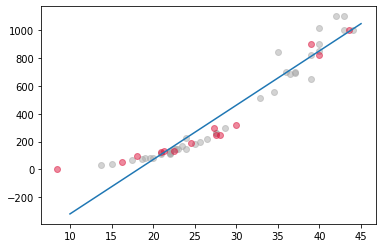

In [ ]:
# 훈련 셋 산점도
plt.scatter(X_tr, y_tr, alpha=0.5, label='train', color='darkgray')

# 테스트 셋 산점도
plt.scatter(X_te, y_te, alpha=0.5, label='test', color='crimson')

# 선형 회귀 곡선 시각화
X_vals = np.arange(10, 45, 0.001).reshape((-1, 1))
y_vals = model.predict(X_vals)
plt.plot(X_vals, y_vals)

plt.show()

In [ ]:
def visualize_regression(X_tr, y_tr, X_te, y_te, degrees, estimator):
    plt.figure(figsize=(10, 10))
    # 훈련 셋 산점도
    plt.scatter(X_tr, y_tr, color='darkgray', alpha=0.5)
    # 테스트 셋 산점도
    plt.scatter(X_te, y_te, color='orange', alpha=0.5)

    # degree=(1, 2, 5, 10)에 대해서 반복
    for d in degrees:
        # Pipeline(Polynomial -> Scaler -> Regressor) 생성
        model = Pipeline([('poly', PolynomialFeatures(degree=d, include_bias=False)),
                        ('scaler', StandardScaler()),
                        ('reg', estimator)])
        # 모델을 훈련 데이터로 학습시킴.
        model.fit(X_tr, y_tr)
        print('degree =', d, ':', model['reg'].coef_)
        # 회귀식을 시각화하기 위해서
        X_vals = np.arange(10, 45, 0.001).reshape((-1, 1))  # 회귀식 시각화 필요한 x좌표
        y_vals = model.predict(X_vals)  # 회귀식 시각화 필요한 y좌표
        plt.plot(X_vals, y_vals, label=f'degree={d}')

    plt.legend()
    plt.grid()
    plt.ylim((-100, 1200))
    plt.show()

degree = 1 : [340.55381311]
degree = 2 : [-188.16429447  532.30423546]
degree = 5 : [ 1090.51349849 -4377.12096334  5960.80924384 -2038.47216236
  -298.04297802]
degree = 50 : [ 6.98882833e+11 -1.00258489e+13  6.60296042e+13 -2.55034855e+14
  6.09952960e+14 -8.49257804e+14  4.52273759e+14  4.19689312e+14
 -5.51591443e+14 -3.28854741e+14  4.59197104e+14  4.64717683e+14
 -2.50299728e+14 -5.52393976e+14 -1.60092632e+14  3.91786172e+14
  5.11210317e+14  7.31510052e+13 -3.53270642e+14 -4.94712910e+14
 -1.96230307e+14  2.13080773e+14  4.96213319e+14  3.80309385e+14
  1.75066814e+13 -3.44230648e+14 -4.87250016e+14 -3.02344800e+14
  2.62593791e+13  3.30040038e+14  4.73494550e+14  3.40422044e+14
  2.18521947e+13 -3.08247209e+14 -4.73280892e+14 -3.86850938e+14
 -8.61310505e+13  2.56242683e+14  4.63841120e+14  4.23130930e+14
  1.23033768e+14 -2.34060437e+14 -4.83471867e+14 -4.17931846e+14
 -4.03199922e+13  4.12817710e+14  5.76576966e+14  1.26944300e+13
 -7.83101811e+14  3.32763612e+14]


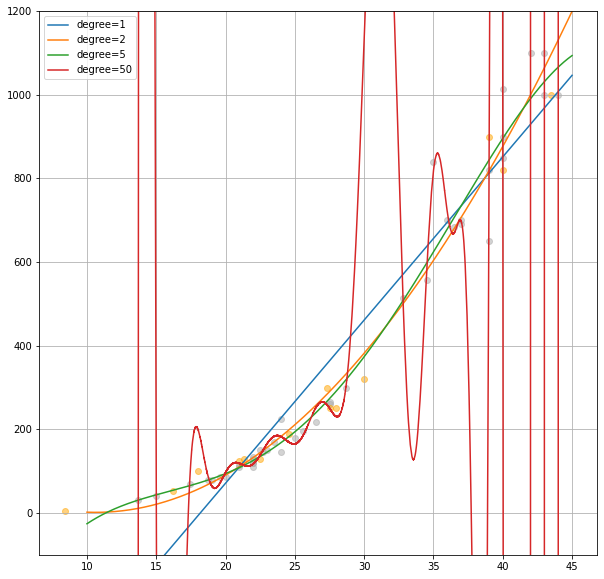

In [ ]:
degrees = (1, 2, 5, 50)
estimator = LinearRegression()
visualize_regression(X_tr, y_tr, X_te, y_te, degrees, estimator)

# 규제(regularization)


* 머신 러닝의 목적은 목적 함수(objective function)/비용 함수(cost function)/손실 함수(loss function)을 최소화하는 것.


* 선형 회귀(linear regression)의 목적은 MSE(mean_squared_error)를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것. 즉, 선형 회귀의 목적 함수는 MSE(w).
$$
J(w) = MSE(w) 
     = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2 
     = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - (w_0 + \sum_{j=1}^{m} w_{j} \cdot x_{ij}))^2
$$
    * $N$: 샘플의 개수(DataFrame의 row의 개수)
    * $m$: 특성의 개수(DataFrame의 column의 개수)
    * $y_i$: $i$번째 샘플의 실젯값
    * $\hat{y_i}$: $i$번째 샘플의 예측값
    * $x_{ij}$: $i$번째 샘플의 $j$번째 특성 값
    * $w_j$: $j$번째 특성에 곱해주는 계수(기울기)

* Ridge(`l2`) 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + \dfrac{\alpha}{2} \mid\mid w \mid\mid ^2
$$

> Ridge 규제의 효과는 고차항들의 계수(coefficients, 기울기)를 작게 만들어서 곡선의 기울기를 완만하게 만들어 주게 됨. overfitting(과대적합)을 줄여주게 됨.

* Lasso(`l1`) 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + \alpha \mid\mid w \mid\mid
$$

> Lasso 규제는 중요하지 않은 고차항들의 계수를 0으로 만들어 줌으로써, 곡선을 완만하게 만들어 주는 효과가 생김. 과대적합을 줄여주는 효과.

* ElasticNet 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + r \alpha \mid\mid w \mid\mid 
              + \dfrac{1 - r}{2} \alpha \mid\mid w \mid\mid ^2
$$

> ElasticNet은 Ridge 규제와 Lasso 규제의 효과를 모두 가지고 있음.

* Ridge, Lasso에서 $\alpha$ 값이 크면 규제가 강해지고, $\alpha$ 값이 작으면 규제가 약해짐($ \alpha \ge 0 $).
* ElasticNet에서 $\alpha$는 규제의 크기를 의미하고, $r$은 `l1` 규제의 비율($0 \le r \le 1$)을 의미함.

## l2 규제: Ridge

degree = 1 : [332.63395699]
degree = 2 : [ 90.58971122 249.48800198]
degree = 5 : [71.46390274 95.36902828 90.24481144 64.15690222 24.69095831]
degree = 50 : [57.071767   71.05492103 71.65634347 63.87632    51.92887907 38.82686003
 26.45737388 15.82631359  7.32628255  0.96590695 -3.45871369 -6.24793939
 -7.72662807 -8.20357587 -7.95156044 -7.19999236 -6.13474486 -4.9016977
 -3.61189738 -2.34712978 -1.16525955 -0.10502713  0.80981179  1.56701183
  2.16298141  2.6004731   2.88674253  3.03210024  3.04878761  2.95011641
  2.74982088  2.46157898  2.09866767  1.67372291  1.19858097  0.68418227
  0.14052254 -0.42336072 -0.99937571 -1.58034537 -2.1599636  -2.73274316
 -3.29395867 -3.83958717 -4.36624834 -4.87114565 -5.35200944 -5.8070427
 -6.23486993 -6.63448935]


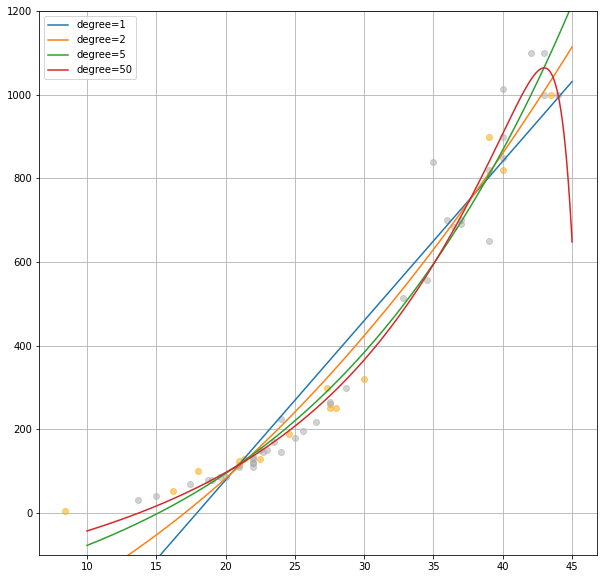

In [ ]:
degrees = (1, 2, 5, 50)
estimator = Ridge(alpha=1.0)
visualize_regression(X_tr, y_tr, X_te, y_te, degrees, estimator)

In [ ]:
model = Pipeline([('poly', PolynomialFeatures(degree=50, include_bias=False)),
                  ('scaler', StandardScaler()),
                  ('reg', Ridge())])

In [ ]:
model.fit(X_tr, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(degree=50, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', Ridge())])

In [ ]:
print('train r2:', model.score(X_tr, y_tr))
print('test r2:', model.score(X_te, y_te))

train r2: 0.9739229136053733
test r2: 0.9813385255457554


## l1 규제: Lasso

degree = 1 : [339.55381311]
degree = 2 : [-37.56688954 381.72140363]
degree = 5 : [  0.         169.86798493 175.39652371   0.          -0.        ]
degree = 50 : [  0.          17.21972877 345.23902643   0.           0.
   0.           0.           0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.         -33.54927135]


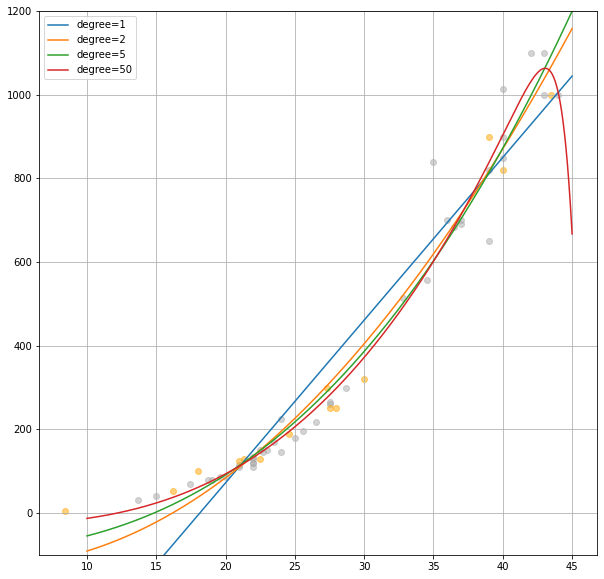

In [ ]:
degrees = (1, 2, 5, 50)
estimator = Lasso(max_iter=10_000)
visualize_regression(X_tr, y_tr, X_te, y_te, degrees, estimator)

ConvergenceWarning이 발생하는 경우, 최적화를 하기 위한 최대 반복 횟수(max_iter) 파라미터 값을 더 크게 하거나, 최적화를 위한 tolerance(수렴 구간)을 더 크게 하면 warning을 없앨 수도 있다.

## ElasticNet

degree = 1 : [226.70254207]
degree = 2 : [132.58403091 142.14452539]
degree = 5 : [65.81871932 66.12553502 64.44511229 61.45264451 57.66069996]
degree = 50 : [53.59542604 50.18178692 45.62074946 40.55542778 35.41660767 30.47765228
 25.89888636 21.76019708 18.08628074 14.8664211  12.06934783  9.65369781
  7.57486967  5.789173    4.25609774  2.93935959  1.80719597  0.83223316
  0.          0.         -0.         -0.         -0.36637745 -0.78477948
 -1.1502603  -1.46955347 -1.7483126  -1.99131998 -2.20266634 -2.38590077
 -2.54414876 -2.68019885 -2.79656151 -2.89550654 -2.97908631 -3.04915098
 -3.10736006 -3.15519292 -3.19395893 -3.22480766 -3.24873859 -3.26661055
 -3.27915054 -3.28696236 -3.29053511 -3.29025196 -3.2863995  -3.27917777
 -3.26871145 -3.25506195]


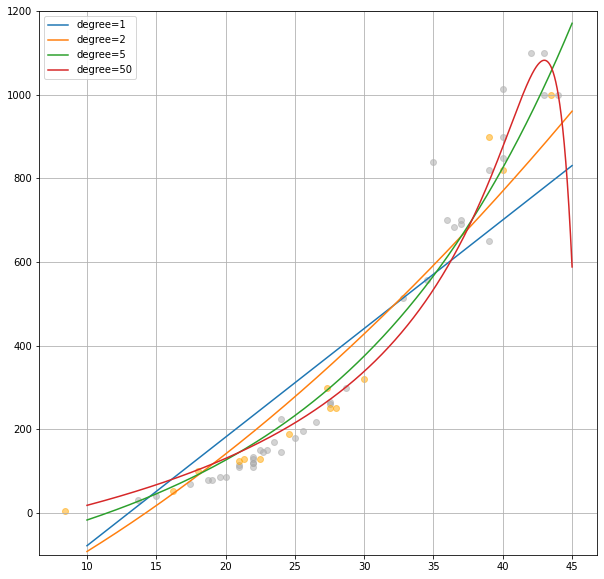

In [ ]:
estimator = ElasticNet()
visualize_regression(X_tr, y_tr, X_te, y_te, degrees, estimator)

# 규제 크기($\alpha$)에 따른 결정 계수의 변화

5차항까지 포함, StandardScaler 사용, 훈련 셋/테스트 셋에서의 r2 score를 계산, 시각화

In [ ]:
X_tr[:5]

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ]])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.319e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.688e+02, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


train scores: [0.9729318909719307, 0.9694267645740603, 0.9669667595405638, 0.9574099753809557, 0.7128959260018337, 0.1419437414816156]
test scores: [0.9792791927855977, 0.9717021238527076, 0.9675102498277163, 0.9741613969257316, 0.7439362036454651, 0.10755935075190703]


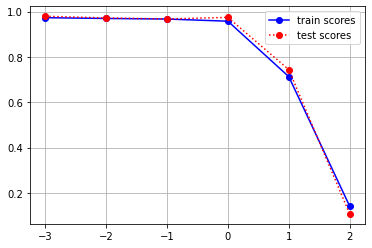

In [ ]:
train_scores = []  # 훈련 셋에서 계산한 결정계수를 저장할 리스트
test_scores = []  # 테스트 셋에서 계산한 결정계수를 저장할 리스트
alphas = [10 ** x for x in range(-3, 3)]  # [0.001, 0.01, 0.1, 1, 10, 100]

for a in alphas:
    poly = PolynomialFeatures(degree=5, include_bias=False)
    scaler = StandardScaler()
    estimator = ElasticNet(alpha=a)
    model = Pipeline([('poly', poly), ('scaler', scaler), ('reg', estimator)])
    model.fit(X_tr, y_tr)
    train_r2 = model.score(X_tr, y_tr)  # 훈련 셋의 결정계수
    train_scores.append(train_r2)
    test_r2 = model.score(X_te, y_te)  # 테스트 셋의 결정계수
    test_scores.append(test_r2)

print('train scores:', train_scores)
print('test scores:', test_scores)

plt.plot(np.log10(alphas), train_scores, 'bo-', label='train scores')
plt.plot(np.log10(alphas), test_scores, 'ro:', label='test scores')
plt.legend()
plt.grid()
plt.show()

규제를 사용하면 과대적합을 줄이면서(없애면서) 일반화 성능을 좋게 만들고 있음.

## 농어 데이터의 모든 컬럼을 변수로 사용, Ridge, Lasso, ElasticNet 규제 크기에 따른 결정 계수 그래프.

In [ ]:
X = perch.iloc[:, 2:].values.copy()  # data, 특성 배열
y = perch['Weight'].values.copy()  # target

In [ ]:
X.shape, y.shape

((56, 4), (56,))

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)

In [ ]:
def visualize_r2_score(estimator, X_tr, y_tr, X_te, y_te):
    train_scores = []  # 규제 크기에 따른 훈련 셋에서의 결정계수를 저장할 리스트.
    test_scores = []  # 규제 크기에 따른 테스트 셋에서의 결정계수를 저장할 리스트.
    alphas = [10 ** x for x in range(-3, 3)]  # 규제 크기: [0.001, 0.01, 0.1, 1, 10, 100]
    for a in alphas:  # 각 규제 크기에 대해서 반복
        # 머신 러닝 모델 생성(Polynomial -> Scaler -> Estimator)
        poly = PolynomialFeatures(degree=5, include_bias=False)
        scaler = StandardScaler()
        if estimator == 'l1':
            reg = Lasso(alpha=a)
        elif estimator == 'l2':
            reg = Ridge(alpha=a)
        elif estimator == 'elastic':
            reg = ElasticNet(alpha=a)
        else:
            raise ValueError('estimator는 "l1", "l2", 또는 "elastic"이어야 함!')

        model = Pipeline([('poly', poly), ('scaler', scaler), ('reg', reg)])
        
        model.fit(X_tr, y_tr)  # 모델 훈련
        train_r2 = model.score(X_tr, y_tr)  # 훈련 셋에서의 결정계수
        train_scores.append(train_r2)
        test_r2 = model.score(X_te, y_te)  # 테스트 셋에서의 결정계수
        test_scores.append(test_r2)

    # 리스트의 내용을 출력
    print('train scores:', train_scores)
    print('test scores:', test_scores)

    # 리스트의 내용을 선그래프로 시각화
    plt.plot(np.log10(alphas), train_scores, 'bo-', label='train $r^2$')
    plt.plot(np.log10(alphas), test_scores, 'r^:', label='test $r^2$')
    plt.legend()
    plt.grid()
    plt.xlabel('alpahs (log scale)')
    plt.ylabel('$R^2$ score')
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.223e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.931e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

train scores: [0.9913081624751734, 0.991160616711604, 0.9902163474611422, 0.9898350521155961, 0.9888395046087162, 0.9079164370253793]
test scores: [0.9824626792817299, 0.9828352217966845, 0.9822471480638032, 0.9800927355337123, 0.9825423368999452, 0.9092831899445631]


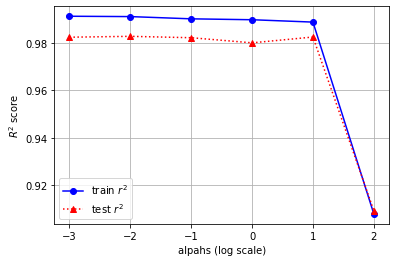

In [ ]:
visualize_r2_score('l1', X_tr, y_tr, X_te, y_te)

train scores: [0.9946716964073975, 0.9926658847510959, 0.9906588529802888, 0.9898642966685524, 0.9891003605036942, 0.9847161412052865]
test scores: [0.8805517581588203, 0.9675695452678644, 0.9829891528180518, 0.9805647119266162, 0.9749015716532, 0.9620345864309697]


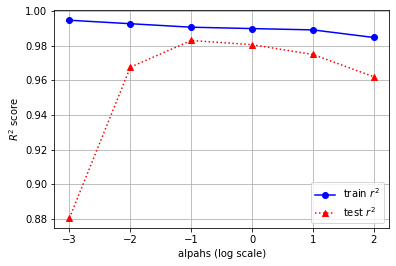

In [ ]:
visualize_r2_score('l2', X_tr, y_tr, X_te, y_te)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.363e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.377e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

train scores: [0.9911600197718459, 0.9903065264301221, 0.9896515210383674, 0.9883866962961532, 0.9807297352710089, 0.8298002302295657]
test scores: [0.9828728562837419, 0.9826006657730557, 0.9792857127589776, 0.9719870935292817, 0.9615684464630995, 0.8421891080992795]


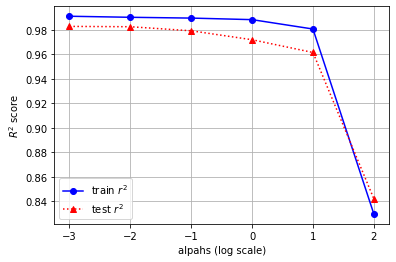

In [ ]:
visualize_r2_score('elastic', X_tr, y_tr, X_te, y_te)